In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
import xgboost as xgb

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.linear_model import Lasso, ElasticNet
from imblearn.over_sampling import SMOTEN
from collections import Counter
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import make_scorer, roc_auc_score, roc_curve, precision_score, precision_recall_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, average_precision_score, mean_squared_error, r2_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from imblearn.under_sampling import TomekLinks


In [306]:
pd.set_option('display.max_columns', None)
np.random.seed(1973) 

In [307]:
# df = pd.read_csv(r"C:\Users\xtaym\OneDrive\Pulpit\mgr\cell2celltrain.csv")
# holdout_innit = pd.read_csv(r""C:\Users\xtaym\OneDrive\Pulpit\cell2cell-duke univeristy.csv"mgr\cell2cellholdout.csv")
# df=pd.read_csv(r'C:\Users\xtaym\OneDrive\Pulpit\cell2cell-duke univeristy.csv')
df=pd.read_csv(r'C:\Users\xtaym\Desktop\telco.csv')

In [308]:
df.head(3)

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer


In [309]:
df=df.drop(columns='Satisfaction Score')
df=df.drop(columns='Contract')

In [310]:
cols_to_drop=['customer_id','zip_code','country','state','latitude','longitude','city','quarter','churn_reason','churn_category','churn_score','customer_status']

In [311]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df=df.drop(columns=cols_to_drop)

In [312]:
df.head(3)

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,population,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_label,cltv
0,Male,78,No,Yes,No,No,0,68701,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,Yes,5433
1,Female,74,No,Yes,Yes,Yes,1,55668,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,Yes,5302
2,Male,71,No,Yes,No,Yes,3,47534,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,Yes,3179


In [313]:
df['churn_label'].value_counts()

churn_label
No     5174
Yes    1869
Name: count, dtype: int64

In [314]:
df[df.duplicated()]

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,population,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_label,cltv


# EDA

In [315]:
# Split the data into training and testing sets
df, holdout_df = train_test_split(df, test_size=0.15, random_state=1973)

In [316]:
print(f'for test and training we have {len(df)} records and for holdout we have {len(holdout_df)} records, both data sets have {len(df.columns)} variables')

for test and training we have 5986 records and for holdout we have 1057 records, both data sets have 36 variables


In [317]:
df.head(2)

,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,population,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_label,cltv
876,Male,79,No,Yes,Yes,No,0,9423,Yes,7,67,Offer A,Yes,42.07,No,Yes,Cable,12,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Bank Withdrawal,60.95,4119.4,17.19,0,2818.69,6920.9,No,5792
6169,Male,59,No,No,No,No,0,14859,No,0,34,NaN,No,0.00,No,Yes,Cable,28,No,No,No,No,No,No,No,Yes,Yes,Bank Withdrawal,25.05,852.7,0.00,0,0.00,852.7,No,3800


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 876 to 4393
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             5986 non-null   object 
 1   age                                5986 non-null   int64  
 2   under_30                           5986 non-null   object 
 3   senior_citizen                     5986 non-null   object 
 4   married                            5986 non-null   object 
 5   dependents                         5986 non-null   object 
 6   number_of_dependents               5986 non-null   int64  
 7   population                         5986 non-null   int64  
 8   referred_a_friend                  5986 non-null   object 
 9   number_of_referrals                5986 non-null   int64  
 10  tenure_in_months                   5986 non-null   int64  
 11  offer                              2723 non-null   object 


In [319]:
df.describe()

,age,number_of_dependents,population,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,cltv
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,46.487638,0.470264,22200.847812,1.949549,32.463081,23.058806,20.553458,64.844470,2284.340226,1.925867,6.705647,755.727427,3044.847432,4402.788339
std,16.767791,0.964985,21164.439218,2.997096,24.579363,15.461291,20.465613,30.055413,2263.845618,7.831511,24.822294,852.298388,2868.484492,1184.514320
min,19.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.400000,2003.000000
25%,32.000000,0.000000,2324.500000,0.000000,9.000000,9.272500,3.000000,35.612500,400.075000,0.000000,0.000000,71.460000,606.925000,3477.250000
50%,46.000000,0.000000,17621.000000,0.000000,29.000000,22.970000,17.000000,70.400000,1398.125000,0.000000,0.000000,408.825000,2122.615000,4530.000000
75%,60.000000,0.000000,36125.000000,3.000000,56.000000,36.470000,27.000000,89.850000,3823.762500,0.000000,0.000000,1201.805000,4830.550000,5384.000000
max,80.000000,9.000000,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8672.450000,49.790000,150.000000,3564.720000,11979.340000,6500.000000


In [320]:
df.shape

(5986, 36)

## DEP VARIABLE

In [321]:
holdout_df['churn_label'].value_counts()

churn_label
No     766
Yes    291
Name: count, dtype: int64

In [322]:
holdout_df.describe()

,age,number_of_dependents,population,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,cltv
count,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000
mean,46.634816,0.459792,21792.763482,1.964995,31.954588,22.393472,20.299905,64.292904,2257.960880,2.167843,7.738884,711.562649,2975.094570,4386.179754
std,16.658588,0.950748,21090.675578,3.025727,24.336767,15.368317,20.160810,30.295470,2280.570087,8.294653,26.644687,813.363980,2847.182039,1175.228477
min,19.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,18.700000,18.850000,0.000000,0.000000,0.000000,21.360000,2007.000000
25%,33.000000,0.000000,2349.000000,0.000000,9.000000,8.600000,4.000000,34.700000,401.300000,0.000000,0.000000,61.230000,591.850000,3410.000000
50%,46.000000,0.000000,16849.000000,0.000000,29.000000,21.670000,17.000000,70.100000,1386.800000,0.000000,0.000000,365.850000,1950.290000,4516.000000
75%,60.000000,0.000000,36125.000000,3.000000,53.000000,35.670000,27.000000,89.900000,3625.200000,0.000000,0.000000,1141.200000,4681.620000,5352.000000
max,80.000000,6.000000,105285.000000,11.000000,72.000000,49.950000,85.000000,117.800000,8684.800000,49.570000,150.000000,3443.760000,11564.370000,6499.000000


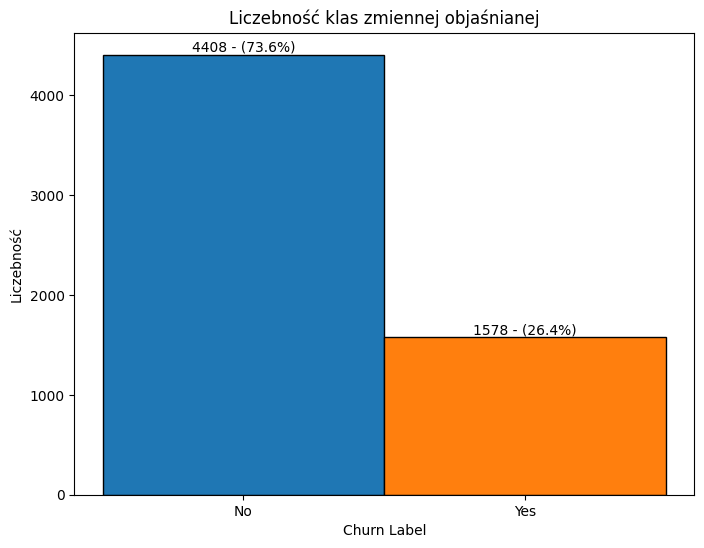

In [323]:
plt.figure(figsize=(8, 6))

# Create the histogram
hist = sns.histplot(df['churn_label'], kde=False)

# Set colors for the bars
colors = ['#1f77b4', '#ff7f0e']  # Customize these colors
for patch, color in zip(hist.patches, colors):
    patch.set_facecolor(color)

# Add labels above the bars
total = len(df['churn_label'])
for patch in hist.patches:
    height = patch.get_height()
    percentage = height / total * 100
    plt.text(
        patch.get_x() + patch.get_width() / 2, 
        height, 
        f'{int(height)} - ({percentage:.1f}%)', 
        ha="center", va="bottom"
    )

# Customizing the plot
plt.ylabel("Liczebność")
plt.xlabel("Churn Label")
plt.title("Liczebność klas zmiennej objaśnianej")

plt.show()

## NA/DUPLICATE HANDLING

In [324]:
df[df.columns[df.isna().sum() > 0]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 876 to 4393
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   offer          2723 non-null   object
 1   internet_type  4693 non-null   object
dtypes: object(2)
memory usage: 140.3+ KB


In [325]:
df.offer.unique()

array(['Offer A', nan, 'Offer E', 'Offer D', 'Offer B', 'Offer C'],
      dtype=object)

In [326]:
df.internet_type.unique()

array(['Cable', 'DSL', 'Fiber Optic', nan], dtype=object)

In [327]:
df['offer'].fillna('no_info', inplace=True)
df['internet_type'].fillna('no_info', inplace=True)

## FEATURES

In [328]:
def plot_eda(columns, df_fun=df, num_cols=2, plt_type='hist', bin_num=30, col_labels=False):
    # Set up the figure and axes for multiple plots
    num_plots = len(columns)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(columns):
        ax = axes[i]
        
        # Plot the histogram for the entire column
        ax.hist(df_fun[col], bins=bin_num, edgecolor='black', color='#007481')
        
        ax.set_title(f'Rozkład zm. {col}')
        ax.set_ylabel('Liczebność')
        ax.grid(True)

        if col_labels is True:
            ax.set_xlabel(col)
        else: 
            ax.set_xlabel('')
        
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [329]:
def plot_eda_binary(columns, df_fun=df, num_cols=2, col_labels=False):
    # Set up the figure and axes for multiple plots
    num_plots = len(columns)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(columns):
        ax = axes[i]

        # Calculate the frequencies for the column
        data_counts = df_fun[col].value_counts().sort_index()
        bar_positions = np.arange(len(data_counts))  # Positions for the bars

        # Plot the bars without splitting by churn column
        ax.bar(bar_positions, data_counts, width=0.6, color='#007481', edgecolor='black')

        ax.set_title(f'{col}')
        ax.set_ylabel('Liczebność')
        ax.set_xticks(bar_positions)
        ax.set_xticklabels(data_counts.index, rotation=45)  # Rotate labels for readability
        ax.grid(True)

        if col_labels is True:
            ax.set_xlabel(col)
        else: 
            ax.set_xlabel('')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [330]:
def plot_bivar_density(columns, df_fun=df, num_cols=2, churn_col='churn_label', col_labels=False):
    # Get the unique values of the churn column
    churn_values = df_fun[churn_col].unique()
    colors = ['blue', 'orange']  # Colors for different churn categories

    # Set up the figure and axes for multiple plots
    num_plots = len(columns)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(columns):
        ax = axes[i]

        for j, churn_val in enumerate(churn_values):
            # Plot the density plot
            sns.kdeplot(df_fun[df_fun[churn_col] == churn_val][col], 
                        ax=ax, 
                        color=colors[j], 
                        label=f'Churn: {churn_val}',
                        fill=True)  # fill=True adds shading under the curve

        ax.set_title(f'Wykres gęstości {col}')
        ax.set_ylabel('udział')
        ax.grid(True)
        ax.legend()  # Add legend to differentiate churn categories

        if col_labels:
            ax.set_xlabel(col)
        else:
            ax.set_xlabel('')
        
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [331]:
numerical_cols = [col for col in df.select_dtypes(include=['number']).columns if df[col].nunique() >= 3]
# numerical_cols = [col for col in numerical_cols if col not in ['number_of_dependents']]

In [332]:
binary_cols = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() == 2 and col != 'churn_label']

In [333]:
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() > 2 and col != 'churn_label']

In [334]:
print(f"""
num of num cols: {len(numerical_cols)}
num of binary cols: {len(binary_cols)}
num of cat cols: {len(cat_cols)}""")


num of num cols: 14
num of binary cols: 18
num of cat cols: 3


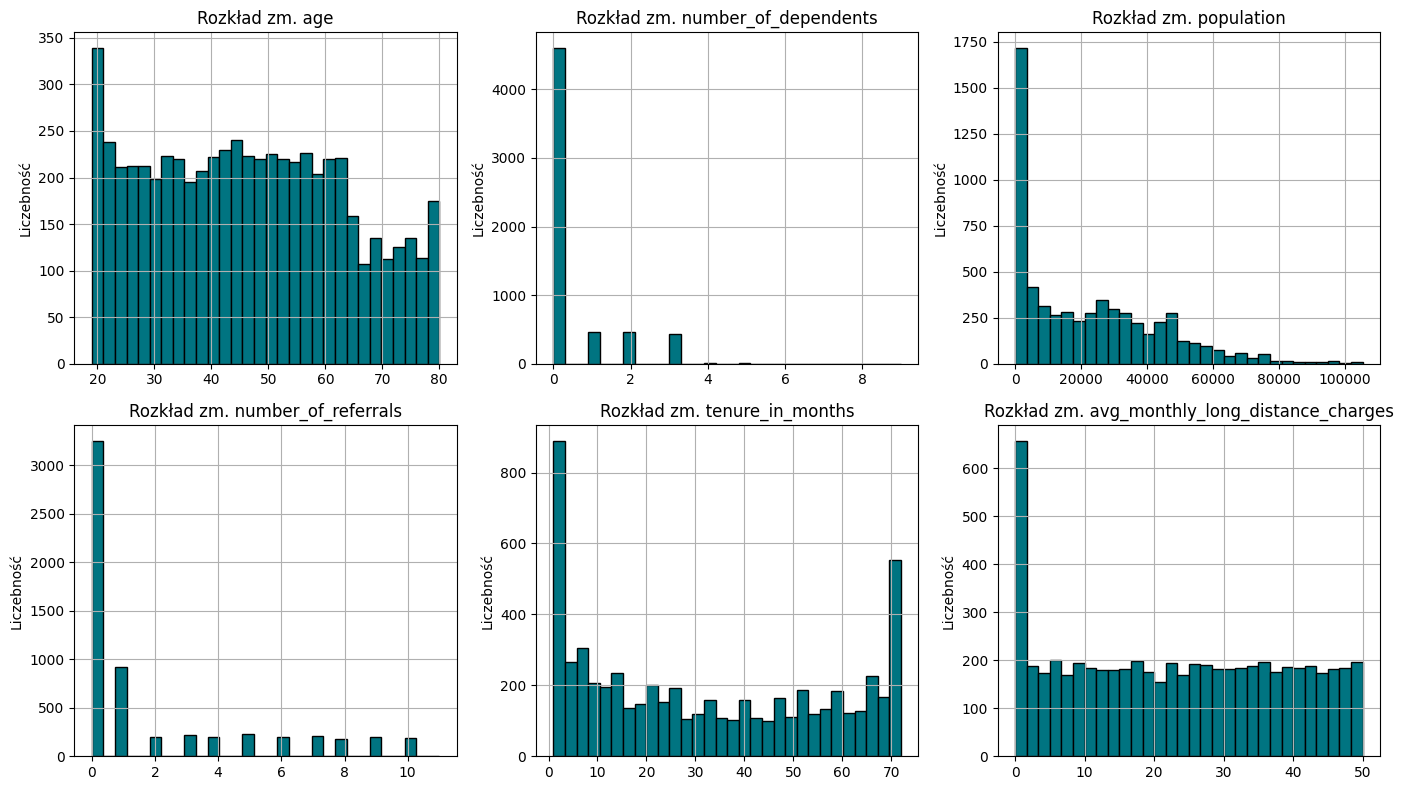

In [335]:
plot_eda(numerical_cols[0:6],num_cols=3)

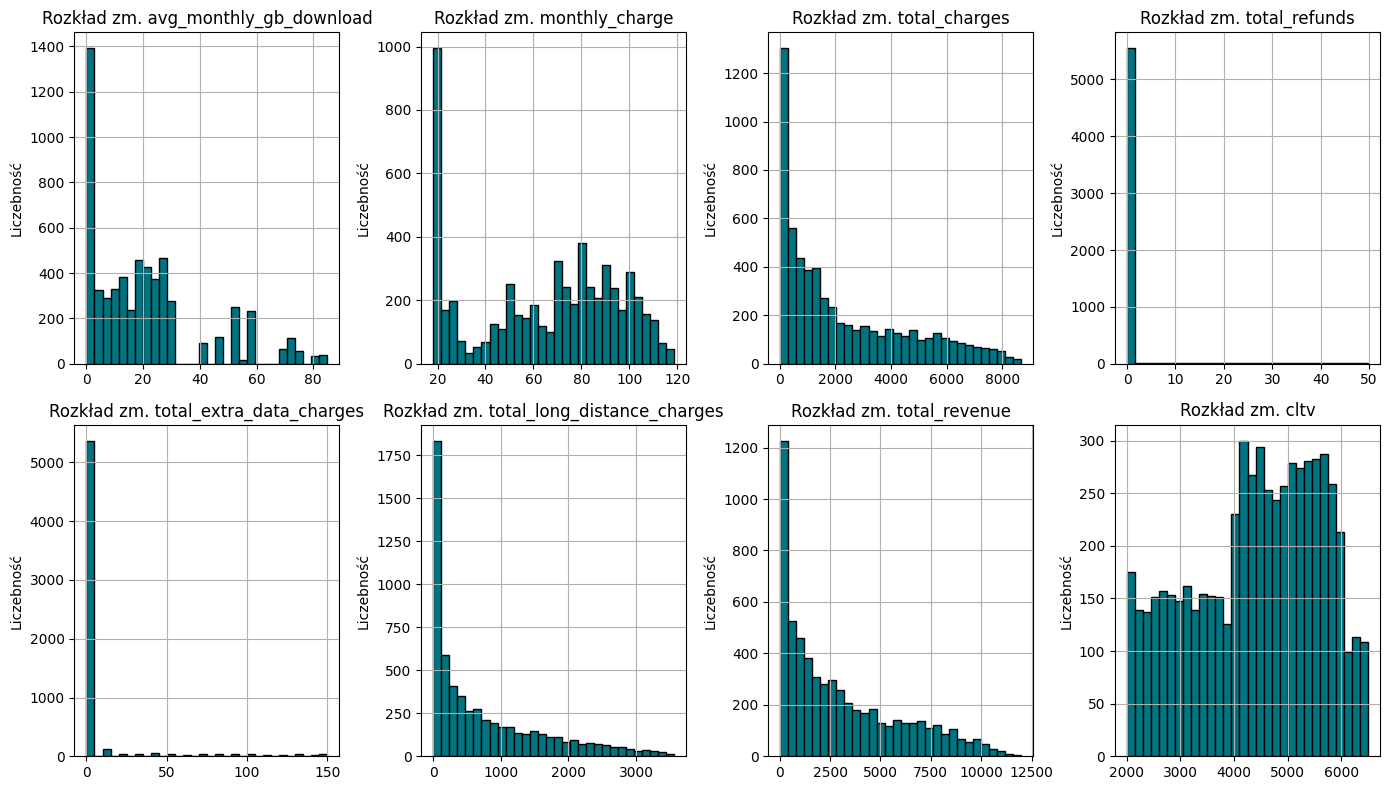

In [336]:
plot_eda(numerical_cols[6:],num_cols=4,bin_num=30)

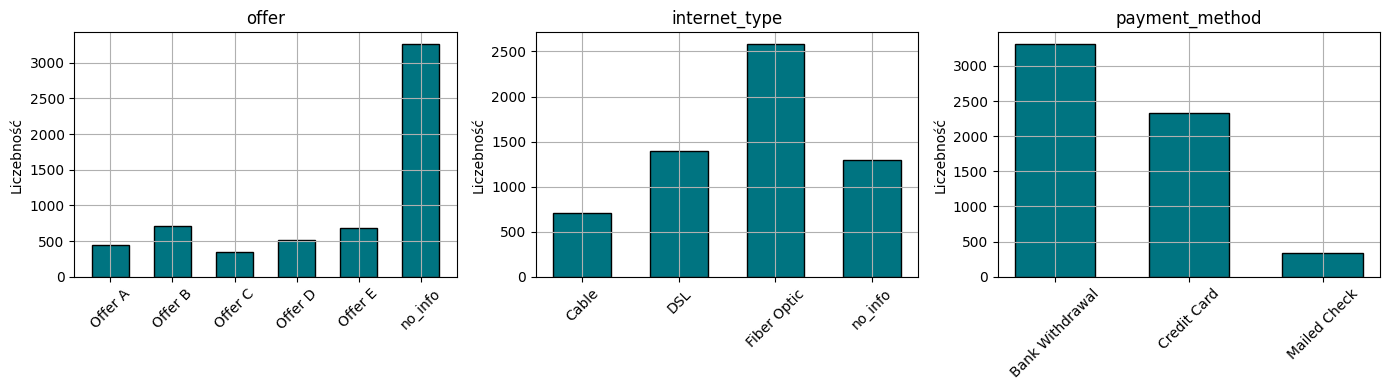

In [337]:
plot_eda_binary(cat_cols,num_cols=3)

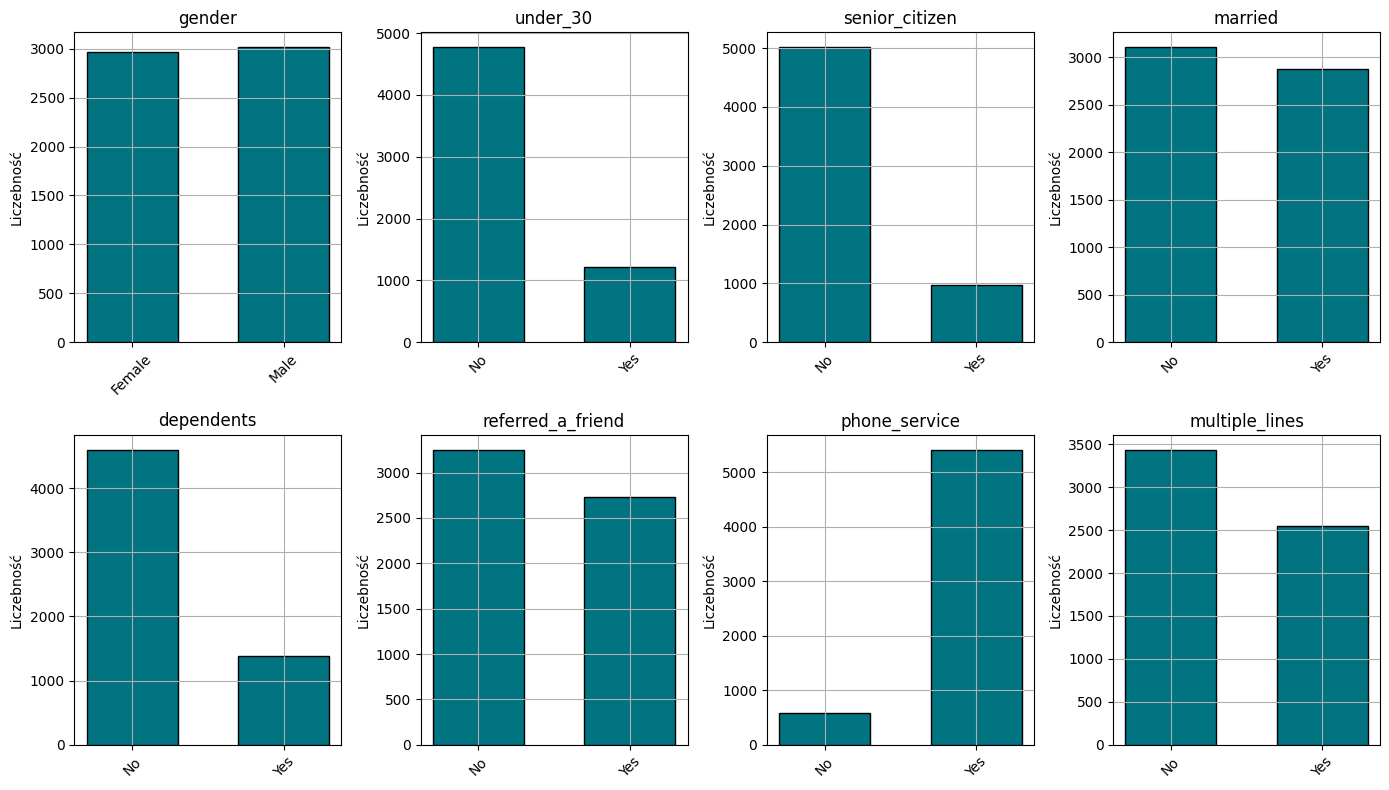

In [338]:
plot_eda_binary(binary_cols[0:8],num_cols=4,col_labels=False)

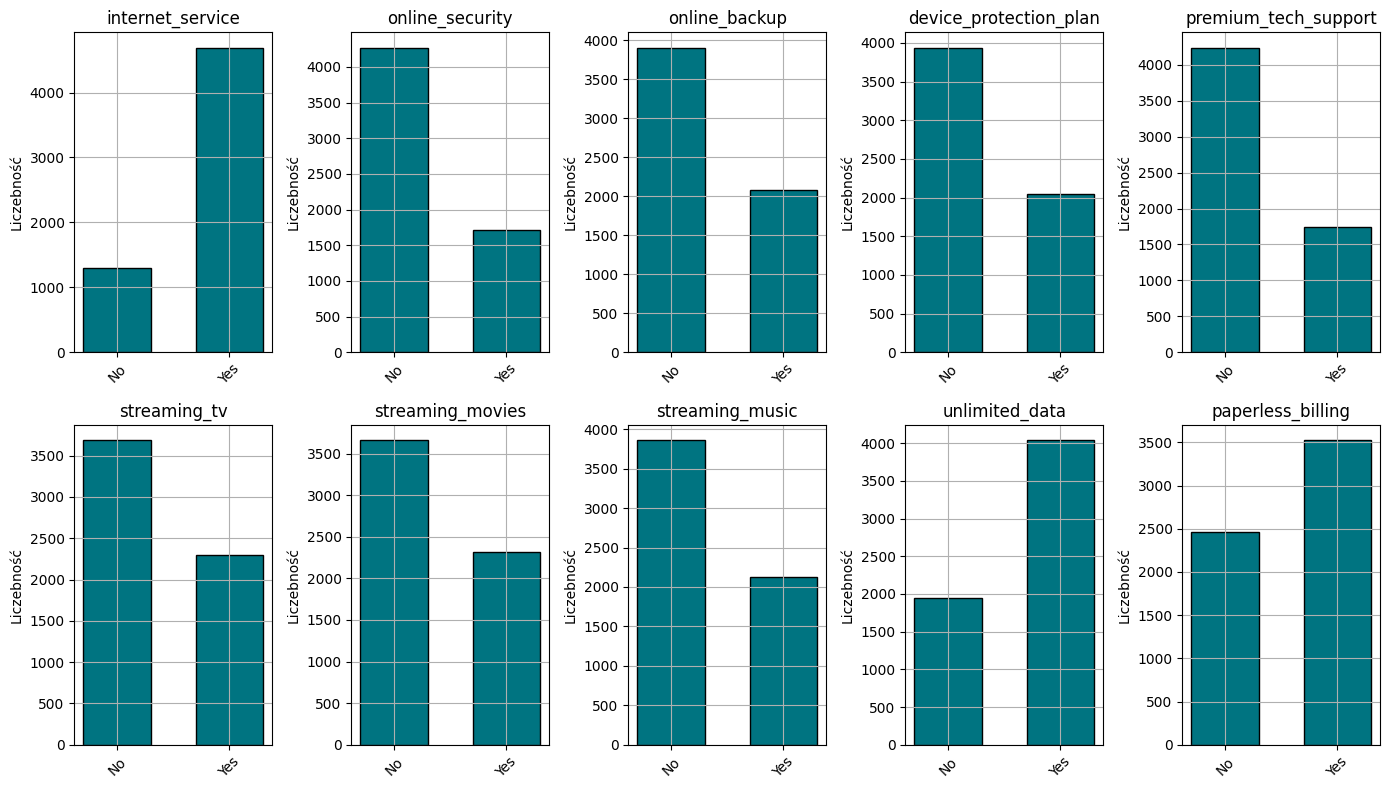

In [339]:
plot_eda_binary(binary_cols[8:],num_cols=5,col_labels=False)

# Data Transformation

In [340]:
5986-2723

3263

In [341]:
1-2723/5986
#offer

0.5451052455730037

In [342]:
df.internet_service.value_counts()

internet_service
Yes    4693
No     1293
Name: count, dtype: int64

In [343]:
5986-4693

1293

In [344]:
1-4693/5986
# iint type

0.21600400935516206

### feature engineering  

In [345]:
df.number_of_dependents.value_counts()

number_of_dependents
0    4601
1     465
2     460
3     437
4       9
5       8
7       2
6       2
9       1
8       1
Name: count, dtype: int64

In [346]:
val_cnt_nod = df['number_of_dependents'].value_counts().sort_index()

In [347]:
df['number_of_dependents'] = df['number_of_dependents'].apply(lambda x: '3/3+' if x >= 3 else x)
df['number_of_dependents'] = df['number_of_dependents'].astype(str)

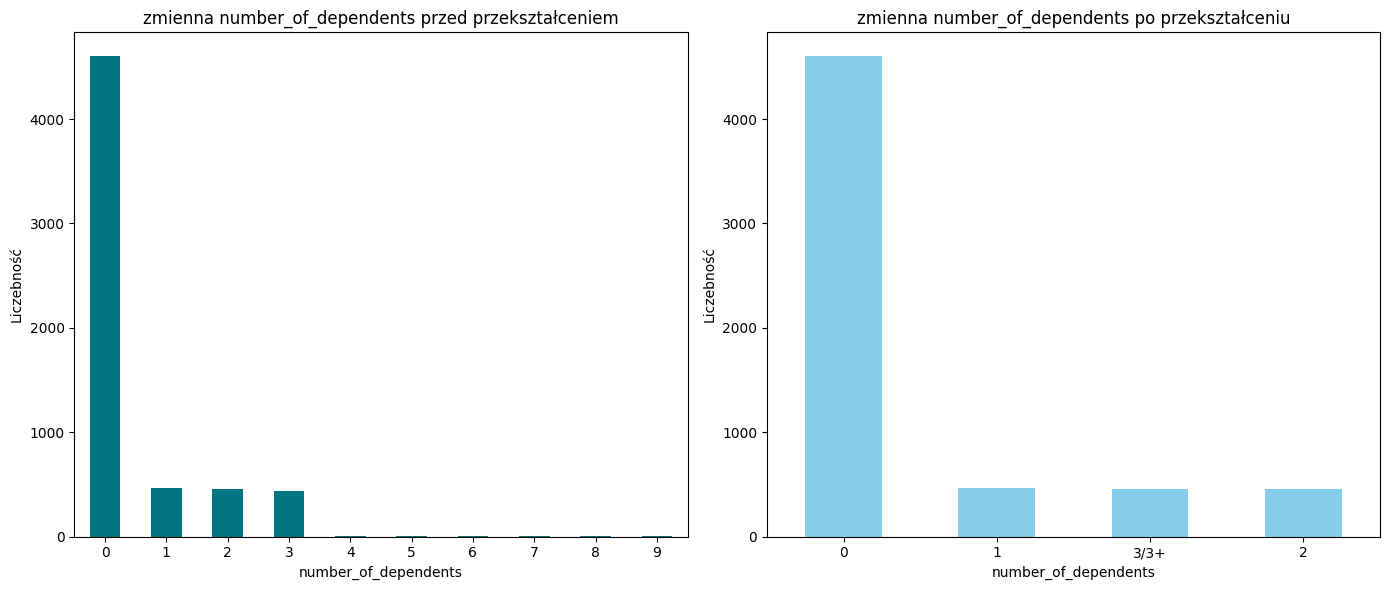

In [348]:
# Plotting the numerical counts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Left plot: Numerical values before binning
val_cnt_nod.plot(kind='bar', color='#007481', ax=axes[0])
axes[0].set_title('zmienna number_of_dependents przed przekształceniem')
axes[0].set_xlabel('number_of_dependents')
axes[0].set_ylabel('Liczebność')
axes[0].set_xticks(range(len(val_cnt_nod)))
axes[0].set_xticklabels(val_cnt_nod.index, rotation=0)


value_counts = df['number_of_dependents'].value_counts()
# Right plot: Categories after binning
value_counts.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('zmienna number_of_dependents po przekształceniu')
axes[1].set_xlabel('number_of_dependents')
axes[1].set_ylabel('Liczebność')
axes[1].set_xticks(range(len(value_counts)))
axes[1].set_xticklabels(value_counts.index, rotation=0)

plt.tight_layout()
plt.show()

In [349]:
value_counts_numerical = df['number_of_referrals'].value_counts().sort_index()

In [350]:
bins = [0, 1, 3, 7, float('inf')]
labels = ['0', '1-2', '3-6', '7+']

# Creating a new column 'referral_bucket' based on the bins and labels
df['number_of_referrals'] = pd.cut(df['number_of_referrals'], bins=bins, labels=labels, right=False, include_lowest=True)


In [351]:
df.number_of_referrals.value_counts()

number_of_referrals
0      3254
1-2    1114
3-6     839
7+      779
Name: count, dtype: int64

In [352]:
df.groupby('number_of_referrals')['churn_label'].value_counts()

number_of_referrals  churn_label
0                    No             2207
                     Yes            1047
1-2                  No              660
                     Yes             454
3-6                  No              774
                     Yes              65
7+                   No              767
                     Yes              12
Name: count, dtype: int64

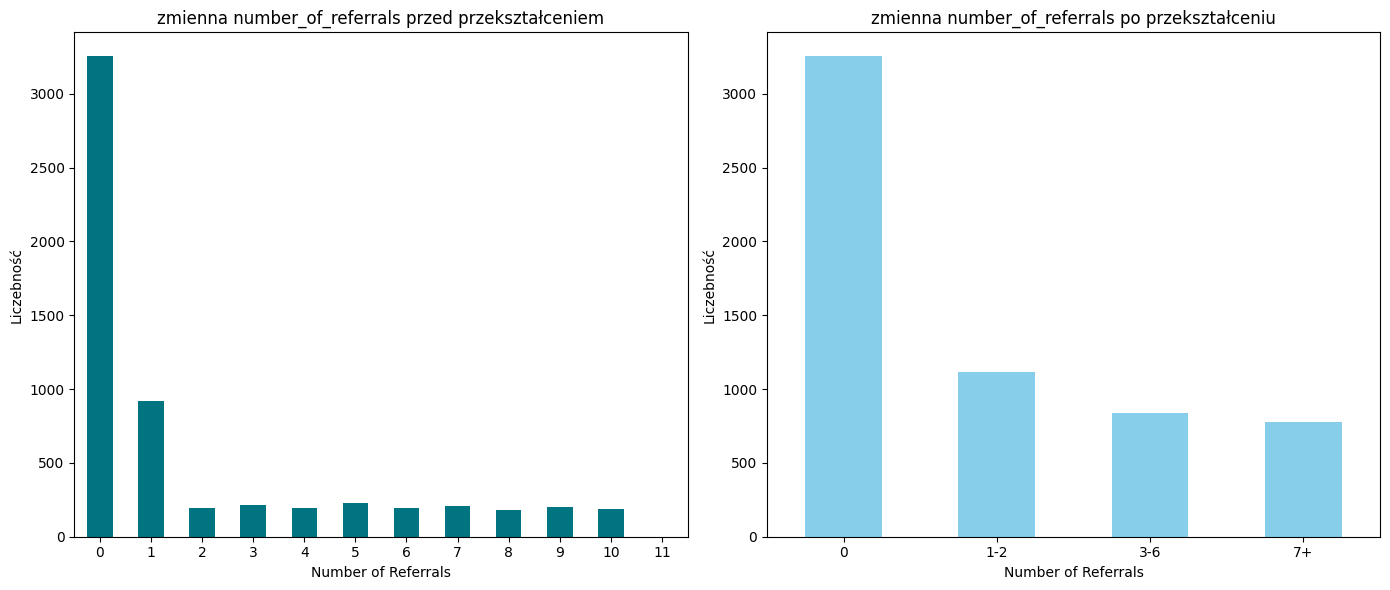

In [353]:
# Plotting the numerical counts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Left plot: Numerical values before binning
value_counts_numerical.plot(kind='bar', color='#007481', ax=axes[0])
axes[0].set_title('zmienna number_of_referrals przed przekształceniem')
axes[0].set_xlabel('Number of Referrals')
axes[0].set_ylabel('Liczebność')
axes[0].set_xticks(range(len(value_counts_numerical)))
axes[0].set_xticklabels(value_counts_numerical.index, rotation=0)


value_counts = df['number_of_referrals'].value_counts()
# Right plot: Categories after binning
value_counts.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('zmienna number_of_referrals po przekształceniu')
axes[1].set_xlabel('Number of Referrals')
axes[1].set_ylabel('Liczebność')
axes[1].set_xticks(range(len(value_counts)))
axes[1].set_xticklabels(value_counts.index, rotation=0)

plt.tight_layout()
plt.show()

In [354]:
df.total_long_distance_charges.skew()

1.2319063143622475

In [355]:
df.total_charges.skew()


0.9575061113994016

In [356]:
df.total_revenue.skew()

0.9149760277288079

In [357]:
df.avg_monthly_gb_download.skew()


1.2121056904081917

In [358]:
data=df.copy()

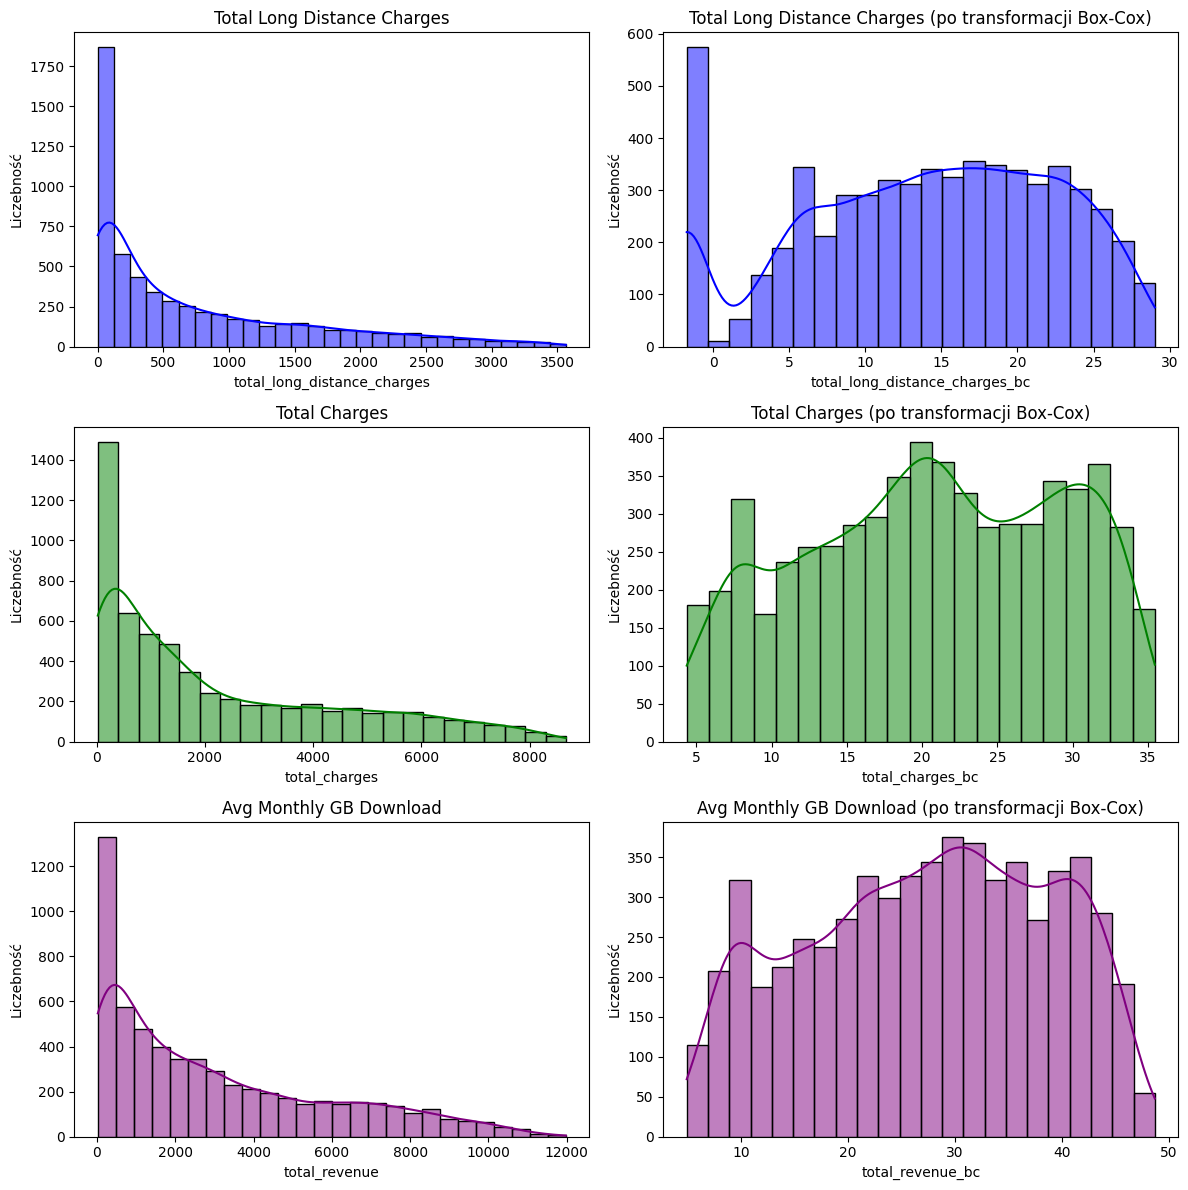

In [359]:
data['total_long_distance_charges_bc'], bc_param_ld_charge = stats.boxcox(data['total_long_distance_charges'] + 0.1)  # +1 to avoid zero values
data['total_charges_bc'], bc_param_charges = stats.boxcox(data['total_charges'] + 0.1)
data['total_revenue_bc'], bc_param_reve = stats.boxcox(data['total_revenue'] + 0.1)
# Plotting
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Original distributions
sns.histplot(data['total_long_distance_charges'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Total Long Distance Charges')
axes[0, 0].set_ylabel('Liczebność')

sns.histplot(data['total_charges'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Total Charges')
axes[1, 0].set_ylabel('Liczebność')

sns.histplot(data['total_revenue'], kde=True, ax=axes[2, 0], color='purple')
axes[2, 0].set_title('Avg Monthly GB Download')
axes[2, 0].set_ylabel('Liczebność')

# Transformed distributions
sns.histplot(data['total_long_distance_charges_bc'], kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Total Long Distance Charges (po transformacji Box-Cox)')
axes[0, 1].set_ylabel('Liczebność')

sns.histplot(data['total_charges_bc'], kde=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Total Charges (po transformacji Box-Cox)')
axes[1, 1].set_ylabel('Liczebność')

sns.histplot(data['total_revenue_bc'], kde=True, ax=axes[2, 1], color='purple')
axes[2, 1].set_title('Avg Monthly GB Download (po transformacji Box-Cox)')
axes[2, 1].set_ylabel('Liczebność')

plt.tight_layout()
plt.show()

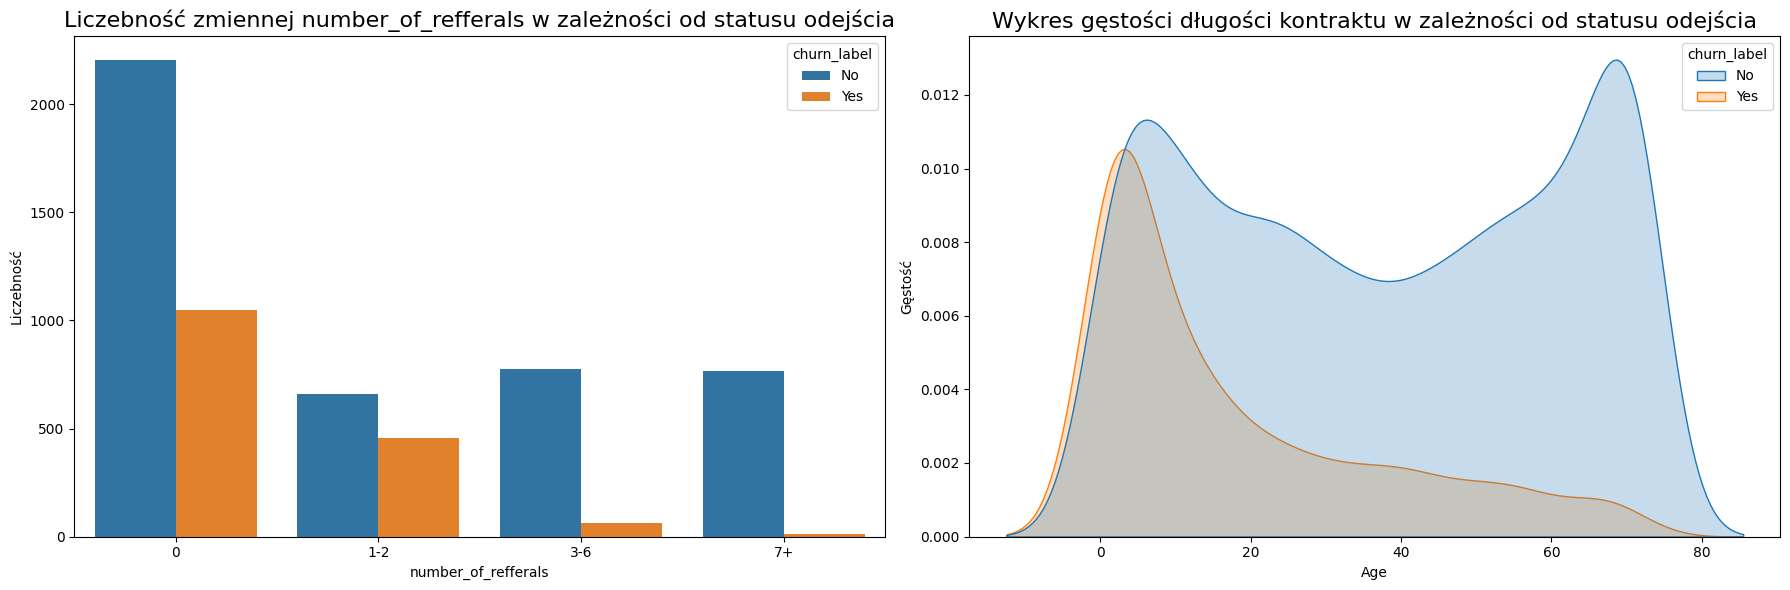

In [360]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='number_of_referrals', hue='churn_label', data=df)
plt.title('Liczebność zmiennej number_of_refferals w zależności od statusu odejścia',fontsize=16)
plt.xlabel('number_of_refferals')
plt.ylabel('Liczebność')

# Plot 2: Scatter plot of Total Long Distance Charges vs. Total Revenue
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='tenure_in_months', hue='churn_label', fill=True)
plt.title('Wykres gęstości długości kontraktu w zależności od statusu odejścia', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Gęstość')

plt.tight_layout()
plt.show()

In [361]:
df['total_long_distance_charges'] = stats.boxcox(df['total_long_distance_charges'] + 0.1, lmbda=bc_param_ld_charge)  # +1 to avoid zero values
df['total_charges'] = stats.boxcox(df['total_charges'] + 0.1,lmbda=bc_param_charges)
df['total_revenue'] = stats.boxcox(df['total_revenue'] + 0.1,lmbda=bc_param_reve)

In [362]:
encoder = OneHotEncoder(drop='if_binary', sparse_output=False)

# Fit and transform only the categorical columns listed in cat_cols
cat_cols.append('number_of_referrals')
cat_cols.append('number_of_dependents')

encoded_df = pd.DataFrame(encoder.fit_transform(df[cat_cols]))

# Get the original column names and assign them to the encoded dataframe
encoded_df.columns = encoder.get_feature_names_out(cat_cols)

# Drop the original categorical columns and concatenate the encoded columns
df = pd.concat([df.drop(columns=cat_cols).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [363]:
df.head(2)

,gender,age,under_30,senior_citizen,married,dependents,population,referred_a_friend,tenure_in_months,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,paperless_billing,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_label,cltv,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E,offer_no_info,internet_type_Cable,internet_type_DSL,internet_type_Fiber Optic,internet_type_no_info,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,number_of_referrals_0,number_of_referrals_1-2,number_of_referrals_3-6,number_of_referrals_7+,number_of_dependents_0,number_of_dependents_1,number_of_dependents_2,number_of_dependents_3/3+
0,Male,79,No,Yes,Yes,No,9423,Yes,67,Yes,42.07,No,Yes,12,Yes,Yes,No,Yes,No,No,No,Yes,Yes,60.95,28.677612,17.19,0,27.050083,41.061779,No,5792,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,Male,59,No,No,No,No,14859,No,34,No,0.00,No,Yes,28,No,No,No,No,No,No,No,Yes,Yes,25.05,17.923295,0.00,0,-1.725482,20.855781,No,3800,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [364]:
df = df.replace({"No": False, "Yes": True})

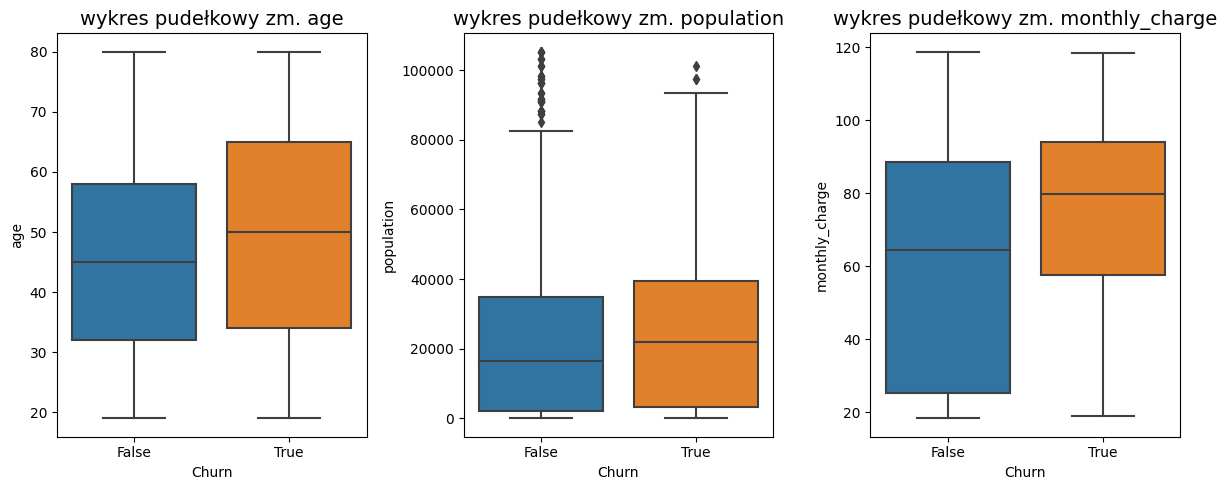

In [365]:
columns_to_plot = ['age', 'population', 'monthly_charge']

# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the columns and create box plots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df['churn_label'], y=df[col], ax=axes[i])
    axes[i].set_title(f'wykres pudełkowy zm. {col}',fontsize=14)
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [366]:
df = df.replace({"Female": False, "Male": True})

In [367]:
binary_cols.append('churn_label')

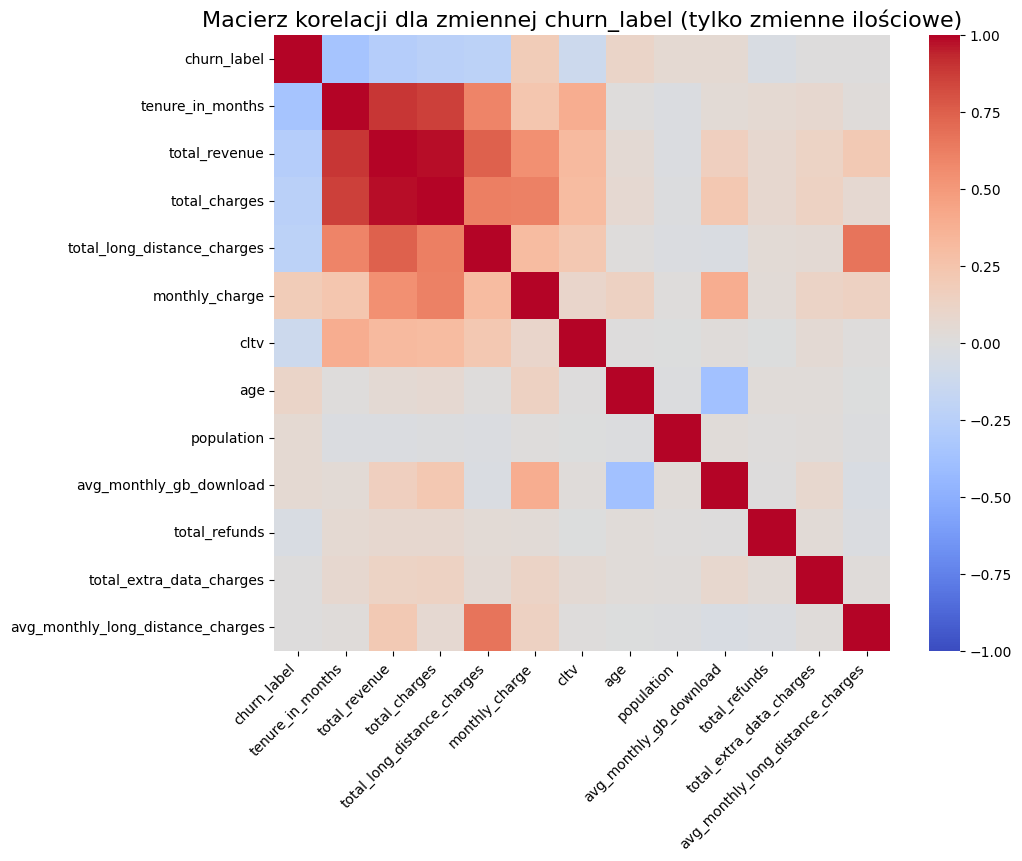

In [368]:
numerical_cols.append('churn_label')
numerical_cols.remove('number_of_dependents')
numerical_cols.remove('number_of_referrals')

corr_matrix = df[numerical_cols].corr()

# Extract the correlations involving the churn column (assuming 'churn_label_Yes' is in numerical_cols)
columns_of_interest = corr_matrix['churn_label'].abs().sort_values(ascending=False).index
selected_corr_matrix = corr_matrix.loc[columns_of_interest, columns_of_interest]

# Plot the correlation matrix with variable labels but no axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)

# Remove axis labels but keep the variable labels
plt.title('Macierz korelacji dla zmiennej churn_label (tylko zmienne ilościowe)', fontsize=16)
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

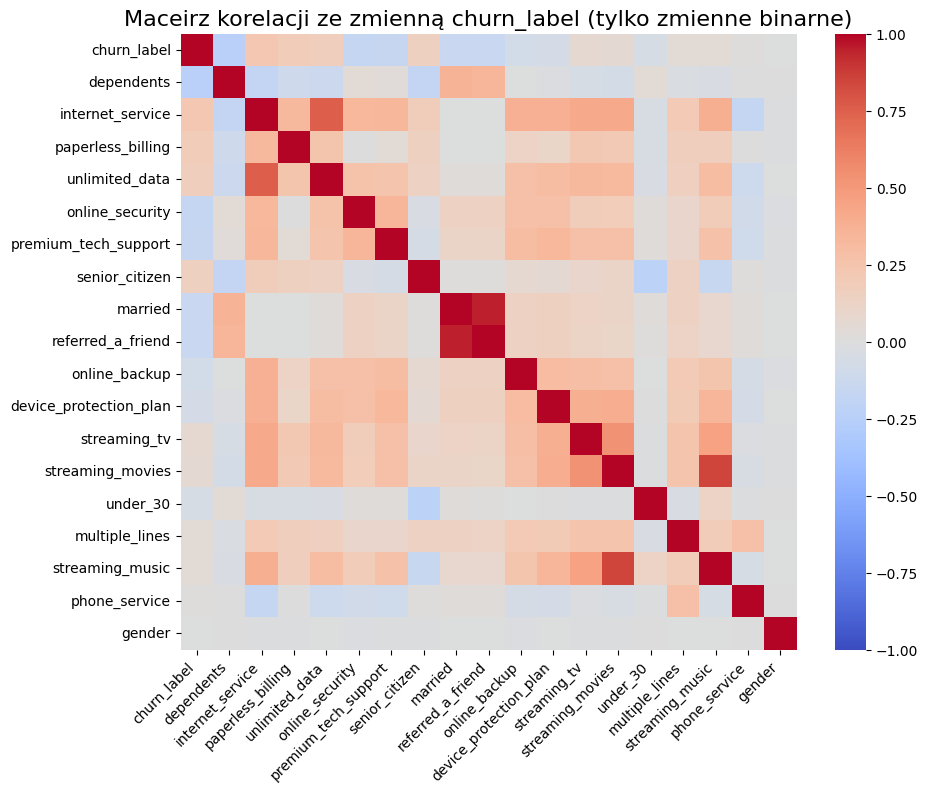

In [369]:
corr_matrix = df[binary_cols].corr()

# Extract the correlations involving the churn column (assuming 'churn_label_Yes' is in numerical_cols)
columns_of_interest = corr_matrix['churn_label'].abs().sort_values(ascending=False).index
selected_corr_matrix = corr_matrix.loc[columns_of_interest, columns_of_interest]

# Plot the correlation matrix with variable labels but no axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)

# Remove axis labels but keep the variable labels
plt.title('Maceirz korelacji ze zmienną churn_label (tylko zmienne binarne)', fontsize=16)
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [370]:
columns_to_exclude = binary_cols + numerical_cols

# Remove 'Churn' from the list of columns to exclude, if it's in the list
columns_to_exclude = [col for col in columns_to_exclude if col != 'churn_label']

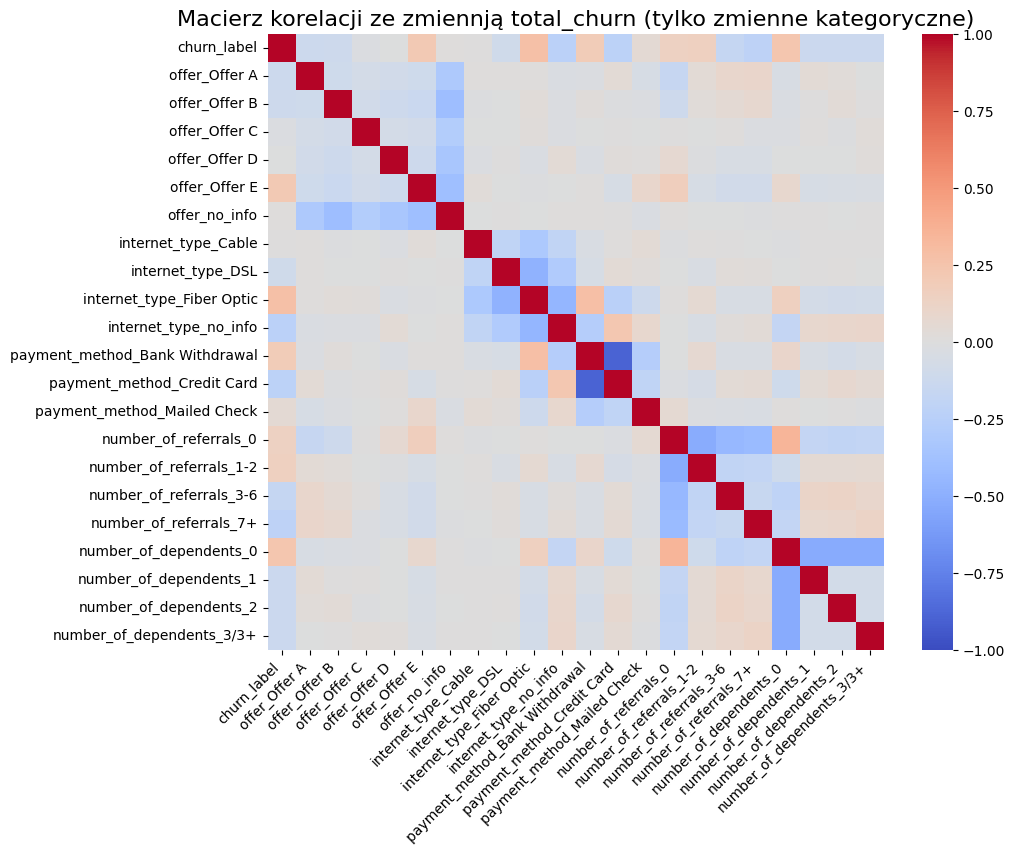

In [371]:
corr_matrix = df[df.drop(columns=columns_to_exclude).columns.unique()].corr()

# Plot the correlation matrix with variable labels but no axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)

# Remove axis labels but keep the variable labels
plt.title('Macierz korelacji ze zmiennją total_churn (tylko zmienne kategoryczne)', fontsize=16)
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

In [372]:
target_correlations = corr_matrix['churn_label']

# Identify features with correlation smaller than 0.01 (absolute value)
low_correlation_features = target_correlations[abs(target_correlations) < 0.05].index

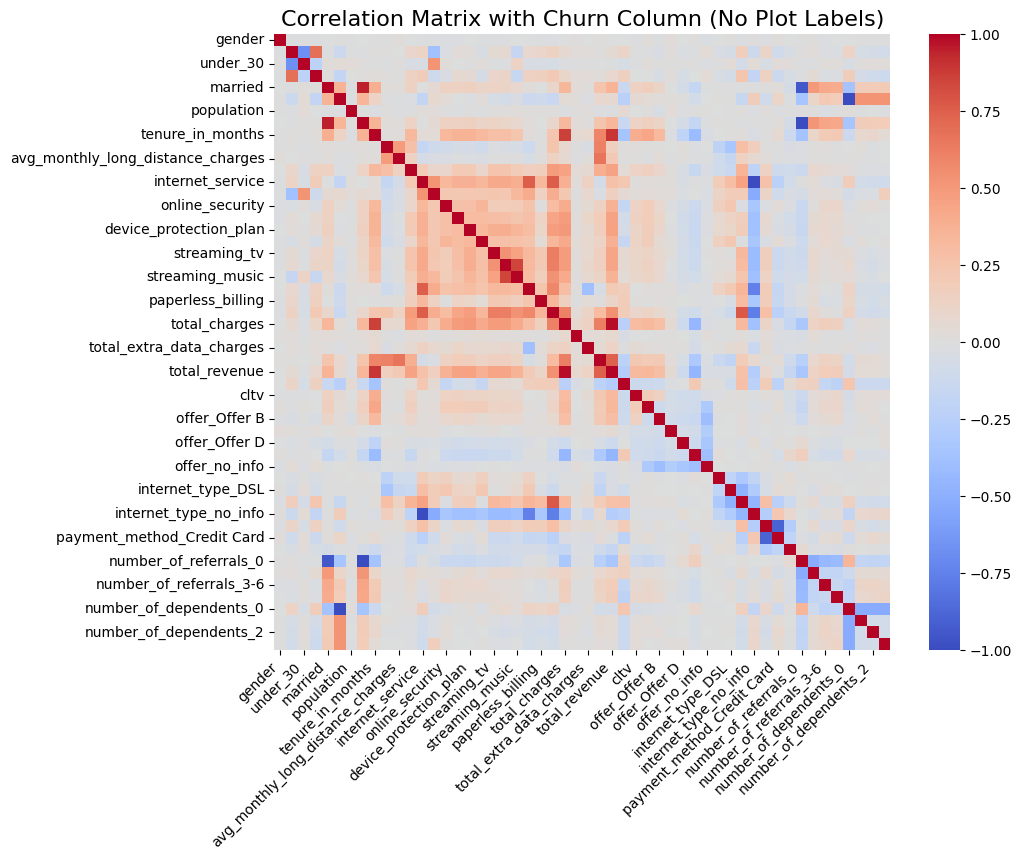

In [373]:
corr_matrix = df.corr()

# Plot the correlation matrix with variable labels but no axis labels
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)

# Remove axis labels but keep the variable labels
plt.title('Correlation Matrix with Churn Column (No Plot Labels)', fontsize=16)
plt.xlabel('')
plt.ylabel('')

# Adjust tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

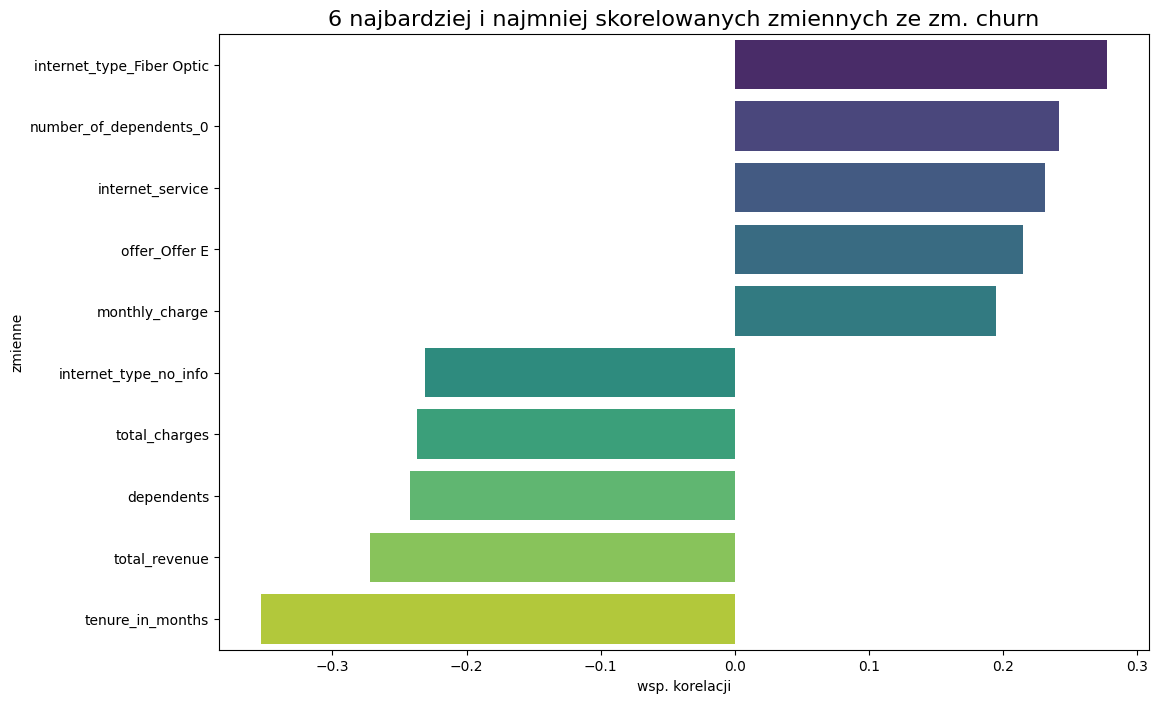

In [374]:
correlation_matrix = df.corr()
churn_correlation = correlation_matrix['churn_label'].sort_values()
most_correlated = churn_correlation.tail(6).head(5)  # Exclude the 'Churn' correlation with itself
least_correlated = churn_correlation.head(5)
combined_correlations = pd.concat([most_correlated, least_correlated]).sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=combined_correlations.values, y=combined_correlations.index, palette='viridis')
plt.title('6 najbardziej i najmniej skorelowanych zmiennych ze zm. churn',fontsize=16)
plt.xlabel('wsp. korelacji')
plt.ylabel('zmienne')
plt.show()

## modeling

How can we improve model? Depends what we aim for?

1. define the problem
1. Here choose a model metric we will be looking to optimise based on market reports and current tactics (google!)

1. EDA and approach to data cleaning manipulation
1. train test split target VAR description

1. Create base LR model to see how it performs
2. See how good can you make LR model by tuning hyperparameters training by using KFOLD / resampling train test and so on
    - we will have lots and lots of variables so using lasso/ ridge could turn out good explain them and see which parameter does the trick
    - adding variable combinations if possible and they make sense as a one way to improve a model
    - outline the advantages of LR such as interpretability of results coefficients and so on

3. ML Methods bagging XGB RandomForest
    - tweaking them by randomgridsearch/ gridsearch
    - train/test rebalancing by undersampling oversampling/ smooten
    - same methods as above 


#### LEVERAGE LIFT USE XD BECAUSE IT SOUNDS WELL

4. Neural network maybe? Idk about the volume of Prior work
5. Sum up the work which model performed better and so on. State that its dependent in use case and recommend using one based on this paper in this case and current trends.

# Train Test Split


In [375]:
holdout_df = holdout_df.replace({"Female": False, "Male": True})
holdout_df['offer'].fillna('no_info', inplace=True)
holdout_df['internet_type'].fillna('no_info', inplace=True)
# holdout_df['satisfaction_score'] = holdout_df['satisfaction_score'].map(satisfaction_mapping)
holdout_df['number_of_dependents'] = holdout_df['number_of_dependents'].apply(lambda x: '3/3+' if x >= 3 else x).astype(str)
holdout_df['number_of_referrals'] = pd.cut(holdout_df['number_of_referrals'], bins=bins, labels=labels, right=False, include_lowest=True)

In [376]:
encoded_holdout_df = pd.DataFrame(encoder.fit_transform(holdout_df[cat_cols]))

# Get the original column names and assign them to the encoded dataframe
encoded_holdout_df.columns = encoder.get_feature_names_out(cat_cols)

# Drop the original categorical columns and concatenate the encoded columns
holdout_df = pd.concat([holdout_df.drop(columns=cat_cols).reset_index(drop=True), encoded_holdout_df.reset_index(drop=True)], axis=1)
holdout_df = holdout_df.replace({"No": False, "Yes": True})

In [377]:
holdout_df['total_long_distance_charges'] = stats.boxcox(holdout_df['total_long_distance_charges'] + 0.1, lmbda=bc_param_ld_charge)  # +1 to avoid zero values
holdout_df['total_charges'] = stats.boxcox(holdout_df['total_charges'] + 0.1,lmbda=bc_param_charges)
holdout_df['total_revenue'] = stats.boxcox(holdout_df['total_revenue'] + 0.1,lmbda=bc_param_reve)

In [378]:
set(df.columns) - set(holdout_df)

set()

In [379]:
X_train = df.drop(columns=['churn_label'])
y_train = df['churn_label']

X_test = holdout_df.drop(columns=['churn_label'])
y_test = holdout_df['churn_label']

In [380]:
df.shape

(5986, 52)

In [381]:
selector = SelectKBest(mutual_info_classif, k=30)

X_train_mi = selector.fit_transform(X_train, y_train)
X_test_mi = selector.transform(X_test)

X_train_mi.shape

(5986, 30)

In [382]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [383]:
# # Assuming X is your feature matrix and y is your target vector
# tl = TomekLinks(random_state=42)
# X_train_res_tl, y_train_res_tl = tl.fit_resample(X_train_scaled, y_train)

In [384]:
# smote = SMOTE()
# X_train_res_smote, y_train_res_smote = smote.fit_resample(X_train_res_tl, y_train_res_tl)

In [385]:
smote_tomek = SMOTETomek(random_state=1973)
X_train_res_smote, y_train_res_smote = smote_tomek.fit_resample(X_train, y_train)

In [386]:
def evaluate_model(y_pred_proba, y_test, ret_df=False, plot_roc=False, name='model_name'):
    # Convert probabilities to class predictions based on a threshold of 0.5
    y_pred = (y_pred_proba[:, 1] >= 0.5).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Assuming 'Yes' is the positive class
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_proba[:,1])
    
    print(f"""Model Performance: 
    Accuracy = {round(accuracy*100, 3)}%
    Recall = {round(recall*100, 3)}%
    Precision = {round(precision*100, 3)}%
    F1 Score = {round(f1*100, 3)}%
    """)
    
    if plot_roc == True:
        # Plotting the ROC curve with different thresholds
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
        plt.figure()
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {round(auc, 3)})')
        plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {name}')
        plt.legend(loc="lower right")
        print(f'AUC = {round(auc*100, 3)}%')

        # # Annotate the thresholds
        # for i in range(len(thresholds)):
        #     plt.annotate(f'{round(thresholds[i], 2)}', 
        #                 xy=(fpr[i], tpr[i]), 
        #                 textcoords='offset points', 
        #                 xytext=(0, 10), 
        #                 ha='center')
        
    plt.show()

    if ret_df:
        metrics = {
            'model': [name],
            'Accuracy': [accuracy],
            'Recall': [recall],
            'Precision': [precision],
            'F1 Score': [f1],
            'AUC': [auc]
        }
        return pd.DataFrame(metrics)

In [387]:
def simple_eval(y_pred, y_test, ret_df=False, name='model_name'):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Assuming 'Yes' is the positive class
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred)
    
    print(f"""Model Performance: 
    Accuracy = {round(accuracy*100, 3)}%
    Recall = {round(recall*100, 3)}%
    Precision = {round(precision*100, 3)}%
    F1 Score = {round(f1*100, 3)}%
    AUC = {round(auc*100, 3)}%
    """)

    if ret_df:
        metrics = {
            'model': [name],
            'Accuracy': [accuracy],
            'Recall': [recall],
            'Precision': [precision],
            'F1 Score': [f1],
            'AUC': [auc]
        }
        return pd.DataFrame(metrics)

# KFOLD

In [388]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1973)

In [389]:
# scoring = make_scorer(f1_score, average='weighted')  # Adjust 'average' depending on your problem
scoring = make_scorer(roc_auc_score, needs_proba=True)

# Lin reg

In [390]:
log_reg = LogisticRegression()

In [391]:
datasets = {
    "Original Data": (X_train, y_train, X_test, y_test),
    "MI Selected Data": (X_train_mi, y_train, X_test_mi, y_test),
    "Scaled Data": (X_train_scaled, y_train, X_test_scaled, y_test),
    "SMOTE Resampled Data": (X_train_res_smote, y_train_res_smote, X_test_scaled, y_test)
}

In [392]:
for name, (X_train, y_train, X_test, y_test) in datasets.items():
    # Check for consistency in the number of samples
    if X_train.shape[0] != y_train.shape[0] or X_test.shape[0] != y_test.shape[0]:
        print(f"Skipping {name} due to inconsistent sample sizes.")
        print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
        print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
        continue
    
    # Train the model
    log_reg.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = log_reg.predict(X_test)
    
    # Evaluate the predictions
    print(f"Evaluating for {name}: X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
    simple_eval(y_pred, y_test)
    print("-" * 50)  # Separator for clarity in output

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Evaluating for Original Data: X_train shape: (5986, 51), X_test shape: (1057, 51)
Model Performance: 
    Accuracy = 77.389%
    Recall = 43.643%
    Precision = 62.871%
    F1 Score = 51.521%
    AUC = 66.926%
    
--------------------------------------------------
Evaluating for MI Selected Data: X_train shape: (5986, 30), X_test shape: (1057, 30)
Model Performance: 
    Accuracy = 75.591%
    Recall = 45.361%
    Precision = 57.143%
    F1 Score = 50.575%
    AUC = 66.218%
    
--------------------------------------------------


C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Evaluating for Scaled Data: X_train shape: (5986, 51), X_test shape: (1057, 51)
Model Performance: 
    Accuracy = 82.308%
    Recall = 59.107%
    Precision = 71.667%
    F1 Score = 64.783%
    AUC = 75.115%
    
--------------------------------------------------
Evaluating for SMOTE Resampled Data: X_train shape: (7974, 51), X_test shape: (1057, 51)
Model Performance: 
    Accuracy = 71.618%
    Recall = 87.285%
    Precision = 49.13%
    F1 Score = 62.871%
    AUC = 76.476%
    
--------------------------------------------------


In [393]:
param_grid = {
    'alpha': [0.1, 0.3,0.5,1],  # Regularization strength
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Mix between Lasso (1.0) and Ridge (0.0)
}

In [394]:
elastic_net = ElasticNet()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    scoring=scoring,  # Use a scoring method
    cv=kfold,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

In [395]:
# Fit GridSearchCV on the SMOTE resampled training data
grid_search.fit(X_train_res_smote, y_train_res_smote)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


In [396]:
y_pred = best_model.predict(X_test_scaled)

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


In [397]:
simple_eval(y_pred>=0.5, y_test)

Model Performance: 
    Accuracy = 67.833%
    Recall = 53.265%
    Precision = 43.175%
    F1 Score = 47.692%
    AUC = 63.316%
    


In [398]:
param_grid = {
    'C': [0.01, 0.1,0.5, 1]  # Inverse of regularization strength
}

In [399]:
lasso_log_reg = LogisticRegression(
    penalty='l1',
    solver='saga',  # 'saga' or 'liblinear' solver supports L1 regularization
    max_iter=10000  # Increase max_iter if convergence issues arise
)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=lasso_log_reg,
    param_grid=param_grid,
    scoring=scoring,  # Use accuracy as the scoring method
    cv=kfold,  # 5-fold cross-validation
    n_jobs=-1  # Use all available cores
)

In [400]:
# Fit GridSearchCV on the SMOTE resampled training data
grid_search.fit(X_train_res_smote, y_train_res_smote)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

In [401]:
simple_eval(best_model.predict(X_test_scaled)>0.5,y_test)

Model Performance: 
    Accuracy = 67.739%
    Recall = 82.131%
    Precision = 45.265%
    F1 Score = 58.364%
    AUC = 72.201%
    


C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [404]:
best_c=best_model.get_params()['C']

In [405]:
param_grid = {
    'C': [best_c*0.75,best_c*0.9,best_c,best_c*1.1,best_c*1,25]  # Inverse of regularization strength
}

In [406]:
grid_search.fit(X_train_res_smote, y_train_res_smote)

C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=1973, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, penalty='l1',
                                          solver='saga'),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 0.5, 1]},
             scoring=make_scorer(roc_auc_score, needs_proba=True))

In [408]:
best_model = grid_search.best_estimator_

In [409]:
simple_eval(best_model.predict(X_test_scaled)>0.5,y_test)

Model Performance: 
    Accuracy = 67.739%
    Recall = 82.131%
    Precision = 45.265%
    F1 Score = 58.364%
    AUC = 72.201%
    


C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# XGB

In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Train the model on the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb=xgb_model.predict_proba(X_test)

Model Performance: 
    Accuracy = 80.416%
    Recall = 58.419%
    Precision = 66.406%
    F1 Score = 62.157%
    
AUC = 86.538%


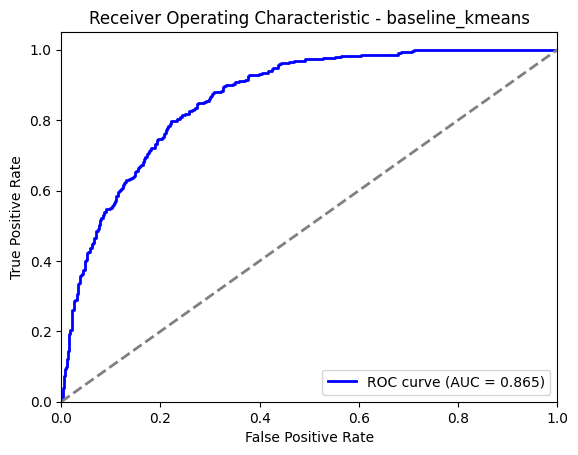

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,baseline_kmeans,0.804163,0.584192,0.664062,0.621572,0.865378


In [ ]:
evaluate_model(y_proba_xgb,y_test,ret_df=True,plot_roc=True,name='baseline_kmeans')

In [ ]:
# Hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': np.linspace(0, 0.5, 5)
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of different combinations to try
    scoring=scoring,
    cv=kfold,
    verbose=1,
    n_jobs=-1,  # Use all available cores
    random_state=1973
)

In [ ]:
# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best F1 Score from cross-validation: {random_search.best_score_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.07444444444444444, 'gamma': 0.375, 'colsample_bytree': 0.8}
Best F1 Score from cross-validation: 0.8843731718081507


In [ ]:
# Predict on the test set with the best found model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba=best_model.predict_proba(X_test)

Model Performance: 
    Accuracy = 83.065%
    Recall = 64.948%
    Precision = 71.053%
    F1 Score = 67.864%
    
AUC = 88.791%


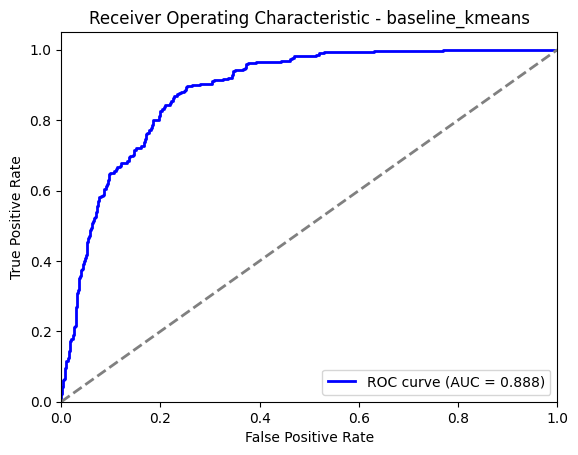

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,baseline_kmeans,0.830653,0.649485,0.710526,0.678636,0.887908


In [ ]:
evaluate_model(y_pred_proba,y_test,ret_df=True,plot_roc=True,name='baseline_kmeans')

In [ ]:

# Get the corresponding feature names
feature_names = X_train.columns

# Combine feature names and importances into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_model.feature_importances_
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
best_params = random_search.best_params_

# Define the grid based on the best parameters from the random search
param_grid = {
    'n_estimators': np.arange(max(50, best_params['n_estimators'] - 50), best_params['n_estimators'] + 100, 50),
    'max_depth': np.arange(max(3, best_params['max_depth'] - 2), best_params['max_depth'] + 3),
    'learning_rate': np.linspace(max(0.01, best_params['learning_rate'] * 0.8), min(0.3, best_params['learning_rate'] * 1.2), 3),
    'subsample': np.clip([best_params['subsample'] * 0.9, best_params['subsample'], best_params['subsample'] * 1.1], 0.6, 1.0),
    # 'colsample_bytree': np.clip([best_params['colsample_bytree'] * 0.9, best_params['colsample_bytree'], best_params['colsample_bytree'] * 1.1], 0.6, 1.0),
    'gamma': np.linspace(max(0, best_params['gamma'] * 0.8), min(0.5, best_params['gamma'] * 1.2), 3)
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scoring,
    cv=kfold,
    verbose=1,
    n_jobs=-1,  # Use all available cores
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model and predictions
best_grid_model = grid_search.best_estimator_
y_grid_pred = best_grid_model.predict(X_test)
y_grid_pred_proba = best_grid_model.predict_proba(X_test)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


Model Performance: 
    Accuracy = 82.971%
    Recall = 64.261%
    Precision = 71.103%
    F1 Score = 67.509%
    
AUC = 88.828%


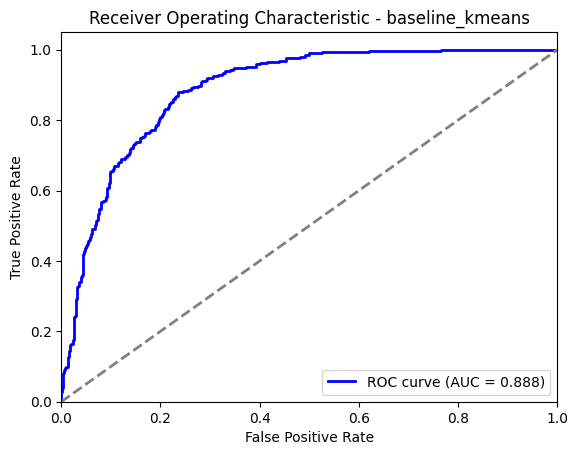

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,baseline_kmeans,0.829707,0.642612,0.711027,0.67509,0.88828


In [ ]:
evaluate_model(y_grid_pred_proba,y_test,ret_df=True,plot_roc=True,name='baseline_kmeans')

# RANDOM FOREST

In [ ]:
rf_model = RandomForestClassifier(random_state=1973)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1973)

In [ ]:
y_pred_proba_rf = rf_model.predict_proba(X_test)

Model Performance: 
    Accuracy = 80.7%
    Recall = 53.265%
    Precision = 69.507%
    F1 Score = 60.311%
    
AUC = 87.318%


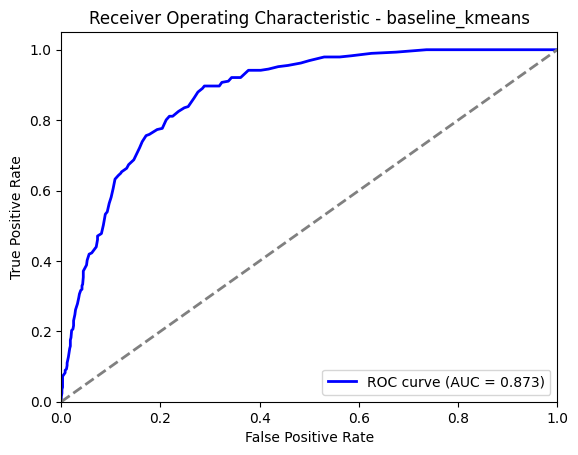

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,baseline_kmeans,0.807001,0.532646,0.695067,0.603113,0.873177


In [ ]:
evaluate_model(y_pred_proba_rf,y_test,ret_df=True,plot_roc=True,name='baseline_kmeans')

In [ ]:
base_grid_rf = {
    'n_estimators': np.arange(100, 1100, 200),
    'max_depth': np.arange(10, 50, 10),
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(1, 5, 1),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


# Initialize GridSearchCV with the base grid
grid_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=base_grid_rf,
    scoring='f1',  # or use your preferred scoring metric
    cv=kfold,
    verbose=1,
    n_jobs=-1,  # Use all available cores
    random_state=1973
)

# Fit the grid search
grid_search_rf.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_from_grid = grid_search_rf.best_params_

# Evaluate the best model from grid search
y_pred_proba_rf_grid = grid_search_rf.best_estimator_.predict_proba(X_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\xtaym\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Model Performance: 
    Accuracy = 81.741%
    Recall = 55.67%
    Precision = 71.681%
    F1 Score = 62.669%
    
AUC = 87.711%


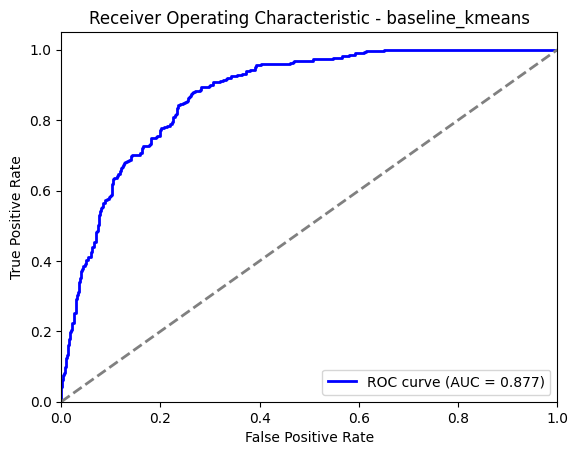

,model,Accuracy,Recall,Precision,F1 Score,AUC
0,baseline_kmeans,0.817408,0.556701,0.716814,0.626692,0.87711


In [ ]:
evaluate_model(y_pred_proba_rf_grid,y_test,ret_df=True,plot_roc=True,name='baseline_kmeans')

In [ ]:
# Expanded grid based on best parameters from the first grid search
refined_grid_rf = {
    'n_estimators': np.unique(np.arange(max(100, best_params_from_grid['n_estimators'] - 200), best_params_from_grid['n_estimators'] + 400, 100)),
    'max_depth': np.unique(np.arange(max(10, best_params_from_grid['max_depth'] - 10), min(50, best_params_from_grid['max_depth'] + 20), 4)),
    'min_samples_split': np.unique(np.arange(max(2, best_params_from_grid['min_samples_split'] - 2), best_params_from_grid['min_samples_split'] + 4, 1)),
    'min_samples_leaf': np.unique(np.arange(max(1, best_params_from_grid['min_samples_leaf'] - 1), best_params_from_grid['min_samples_leaf'] + 2, 1)),
    'max_features': [best_params_from_grid['max_features']],
    'bootstrap': [best_params_from_grid['bootstrap']]
}

# Initialize GridSearchCV with the refined grid
refined_grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=refined_grid_rf,
    scoring='f1',  # or your preferred scoring metric
    cv=kfold,
    verbose=1,
    n_jobs=-1,  # Use all available cores
    # random_state=1973
)

# Fit the refined grid search
refined_grid_search_rf.fit(X_train, y_train)

# Evaluate the best model from the refined grid search
best_model_rf = refined_grid_search_rf.best_estimator_
y_pred_proba_rf_refined_grid = best_model_rf.predict_proba(X_test)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


KeyboardInterrupt: 

In [ ]:
evaluate_model(y_pred_proba_rf_refined_grid,y_test,ret_df=True,plot_roc=True,name='baseline_kmeans')